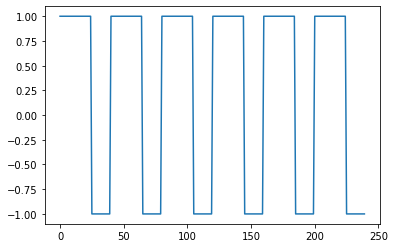

In [91]:
# Question 1.1 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
ONES_DURATION = [15, 20, 25, 15, 20, 25]
N = 240
NUM_T_SOURCES = 6
tc = []
t_vector_names = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']

for vector_num in range(NUM_T_SOURCES):
    vector = []
    index = 0
    # adding in 0s while incrementing to arrival 
    while index < AV[vector_num]:
        vector.append(0)
        index += 1
    one_count = 0
    inc_count = 0
    while index < N:
        # resetting counts if an increment has been completed
        if inc_count >= IV[vector_num]:
            inc_count = 0
            one_count = 0
        if one_count < ONES_DURATION[vector_num]:
            vector.append(1)
            one_count += 1
        else:
            vector.append(-1)
        # incrementing counters 
        inc_count += 1
        index += 1   
    # plotting time course
    plt.clf()
    plt.plot(range(len(vector)), vector)
    plt.savefig('../plots/1.1_time_courses/tc_' + str(vector_num + 1) + '.jpeg')
    # mean subtraction followed by division by std dev
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]

    tc.append(vector)

# check matrix 
def check_vector(vector):
    prev_value = vector[0]
    count = 0
    print_list = []
    for val in vector:
        if val == prev_value:
            count += 1
        else:
            print_list.append([count, prev_value])
            count = 1
            prev_value = val
    print(print_list)

# rotating matrix so that a df can be made with dimensions 240 x 6 
tc  = zip(*reversed(tc))
tc_df = pd.DataFrame(tc, columns = t_vector_names)

<Figure size 432x288 with 0 Axes>

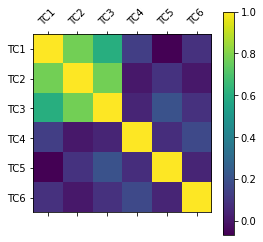

In [92]:
#Question 1.2
def get_cm(df, num_vectors, tick_labels, save_path):
    plt.clf()
    if len(df.iloc[0]) == num_vectors:
        plt.matshow(df.corr())
    else:
        plt.matshow(df.T.corr())
    plt.colorbar()
    ticks = [i for i in range(num_vectors)]
    plt.xticks(ticks, tick_labels, rotation=45)
    plt.yticks(ticks, tick_labels)
    plt.savefig(save_path)

get_cm(tc_df, NUM_T_SOURCES, t_vector_names, '../plots/1.2_correlation_matrix/CM.jpeg')    

<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

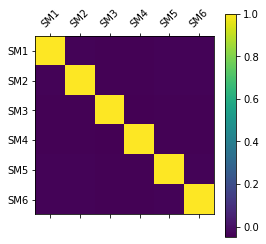

In [93]:
# Question 1.3
tmpSM = []
NUM_MAPS = 6 
MAP_WIDTH = 21
MAP_LENGTH = 21
V = 441
V_SLICE = [[2,6], [2,6], [8,13], [8,13], [15, 19], [15, 19]]
H_SLICE = [[2,6], [15,19], [2,6], [15,19], [2, 6], [15, 19]]
s_vector_names = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']

for matrix_num in range(NUM_MAPS):
    # creating blank matrix of 0s 
    matrix = []
    for i in range(MAP_LENGTH):
        row = []
        for j in range(MAP_WIDTH):
            row.append(0)
        matrix.append(row)
    # adding ones 
    for i in range(V_SLICE[matrix_num][0], V_SLICE[matrix_num][1]):
        for j in range(H_SLICE[matrix_num][0], H_SLICE[matrix_num][1]):
            matrix[i][j] = 1
    # plotting map
    plt.clf()
    plt.matshow(matrix)
    plt.colorbar()
    plt.xticks(np.arange(0, MAP_WIDTH+1, 2.0))
    plt.yticks(np.arange(0, MAP_LENGTH+1, 2.0))
    plt.savefig('../plots/1.3_spacial_maps/sm_' + str(matrix_num + 1) + '.jpeg' )

    tmpSM.append(matrix)

# reshaping array
sm = []
for matrix_num in range(NUM_MAPS):
    vector = []
    for row in tmpSM[matrix_num]:
        for val in row:
            vector.append(val)
    sm.append(vector)

sm_df = pd.DataFrame(sm, columns = range(1, V+1))
get_cm(sm_df, NUM_MAPS, s_vector_names, '../plots/1.3_spacial_maps/CM.jpeg')

/home/hjthorpe/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hjthorpe/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

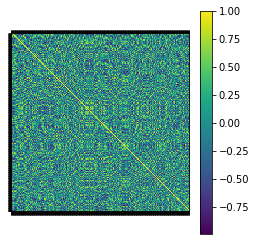

In [96]:
# Question 1.4
T_NOISE_VAR = 0.25
S_NOISE_VAR = 0.015
MEAN = 0

def get_noise(width, length, mean, var):
    gamma = []
    noise = list(np.random.normal(mean, np.sqrt(var), size=length*width))
    index = 0 
    for i in range(length):
        vector = []
        for j in range(width):
            vector.append(noise[index])
            index += 1
        gamma.append(vector)
    return gamma, noise

# generating temporal noise, correlation matrix and histogram
gamma_t, t_noise = get_noise(NUM_T_SOURCES, N, MEAN, T_NOISE_VAR)
gamma_t_df = pd.DataFrame(gamma_t,  columns = t_vector_names)
get_cm(gamma_t_df, NUM_T_SOURCES, ['N_TC1', 'N_TC2', 'N_TC3', 'N_TC4', 'N_TC5', 'N_TC6'], '../plots/1.4_noise/time_noise_cm.jpeg')
plt.clf()
sns.distplot(t_noise)
plt.savefig('../plots/1.4_noise/time_noise_hist.jpeg')

# generating spacial noise, correlation matrix and histogram
gamma_s, s_noise = get_noise(V, NUM_MAPS, MEAN, S_NOISE_VAR)
gamma_s_df = pd.DataFrame(gamma_s,  columns = range(1, V+1))
get_cm(gamma_t_df, NUM_MAPS, ['N_SM1', 'N_SM2', 'N_SM3', 'N_SM4', 'N_SM5', 'N_SM6'], '../plots/1.4_noise/space_noise_cm.jpeg')
plt.clf()
sns.distplot(t_noise)
plt.savefig('../plots/1.4_noise/space_noise_hist.jpeg')

# product of Gamma t and Gamma s
noise_product_df = pd.DataFrame(np.dot(gamma_t_df, gamma_s_df), columns=range(1, V+1))
get_cm(noise_product_df, V, [], '../plots/1.4_noise/noise_product_cm.jpeg')


240


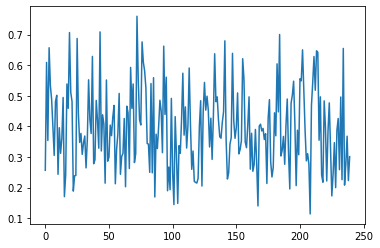

In [90]:
# Question 1.5 
left = (tc_df.add(gamma_t_df))
right = (sm_df.add(gamma_s_df))
X = np.dot(left, right)
print(len(X))

# checking if TC x Gamma_s and Gamma_t x SM exists
tc_space_noise_product = np.dot(tc_df, gamma_s_df)
sm_time_noise_product = np.dot(gamma_t_df, sm_df)

# plotting 100 random series 
time_series_for_plot = random.sample(range(len(X[0])), 100)
plt.clf()
for time_series_num in time_series_for_plot:
    time_series = []
    for row in X:
        time_series.append(row[time_series_num])
    plt.plot(range(len(time_series)), time_series)
plt.savefig('../plots/1.5_X/random_time_series.jpeg')

# plotting variances of variables
vars = []
for variable in X:
    var = np.var(variable)
    vars.append(var)
plt.clf()
plt.plot(range(len(vars)), vars)
plt.savefig('../plots/1.5_X/variances.jpeg')

# standardizing X
X_standardized = []
for variable in range(len(X)):
    vector = X[variable]
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]
    X_standardized.append(vector)
X = X_standardized

In [ ]:
# Question 2.1 


In [ ]:
# Question 2.2


In [ ]:
# Question 2.3


In [ ]:
# Question 2.4


In [ ]:
# Question 2.5 
